#### Template from NEDL : https://www.youtube.com/c/NEDLeducation  <br>   <br>


Trade parameters : win rate, take profit, stop loss, fees and leverage

In [1]:
# The trade parameters
win_rate = 0.55 # just above 0.5
take_profit = 0.10
stop_loss = 0.02
fee_rate = 0.002
leverage = 2

Simulation parameters : number of simulation and number of trade

In [2]:
# The simulations parameters
n_simus = 1000
n_trades = 300

In [3]:
import numpy as np
import matplotlib.pyplot as plt

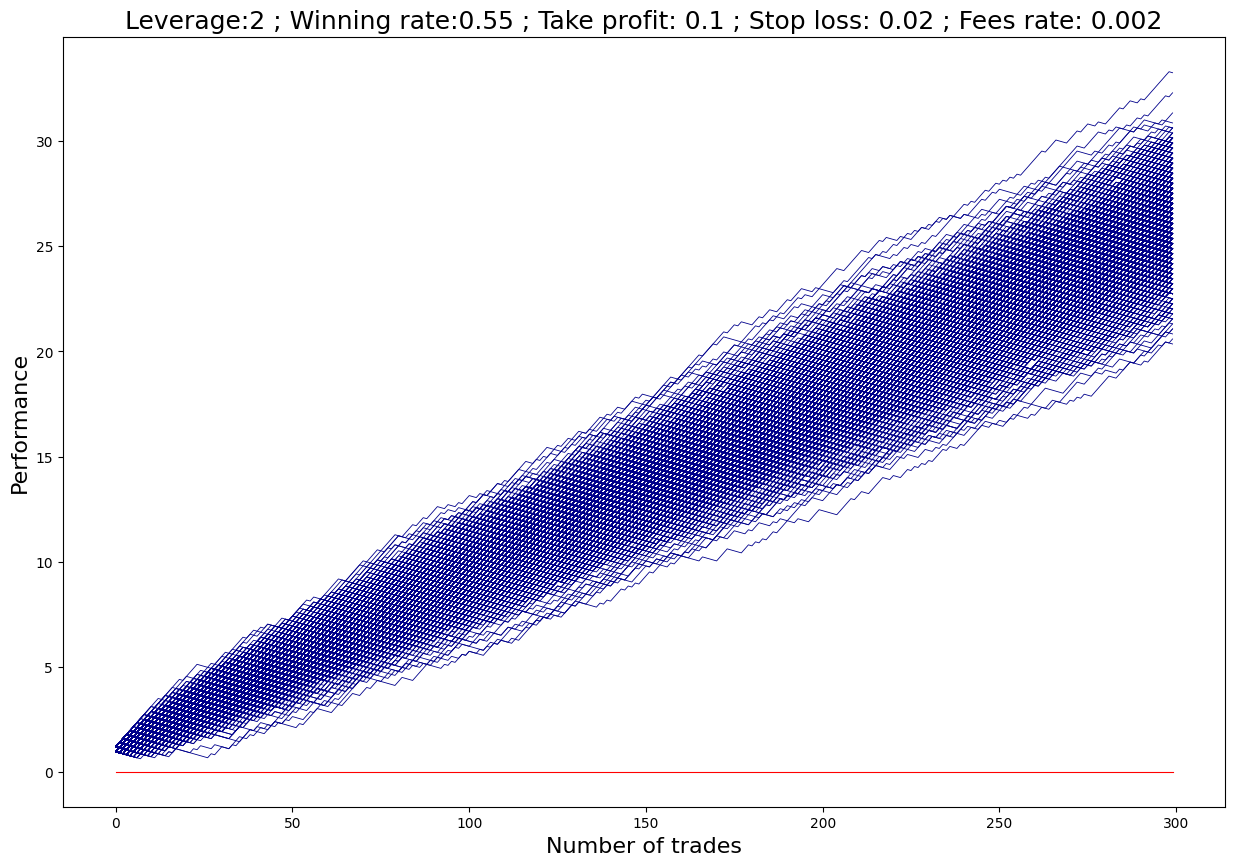


+++++++++++++++++++++++++

Trade PNL expectancy (without any leverage): 4.18%
Number of simulations that reached 0: 0
Minimal portfolio value encountered: 0.6173
Average final portfolio value: 26.19
Minimal final portfolio value: 20.36

+++++++++++++++++++++++++



In [4]:
# Win rate probability law
X = lambda : 1 if np.random.rand() <= win_rate else 0

# Return on Investment law
def s(x):
    """Return the PNl of a trade (fees included)"""
    if x == 1:
        return leverage * ((1-fee_rate)*take_profit - fee_rate - (1-fee_rate)*(1+take_profit)*fee_rate)
    else:
        return - leverage * ((1-fee_rate)*stop_loss + fee_rate + (1-fee_rate)*(1-stop_loss)*fee_rate)

# Define the array to store the simulations
MC = np.zeros(shape=(n_trades, n_simus))
for i in range(n_trades):
    for j in range(n_simus):
        MC[i,j] = s(X())

# Now, compute the cumulative sum, count the simulations that fail (reach 0)
# And plot each simulation
fig = plt.figure(figsize=(15, 10))
n_null = 0
for j in range(n_simus):
    MC[:,j] = 1 + MC[:,j].cumsum()
    plt.plot(MC[:,j], linewidth=0.6, color='darkblue')
    if False in np.where(MC[:,j] >= 0, True, False):
        n_null += 1
        
# Plot all the simulations
plt.plot([0]*n_trades, linewidth=0.8, color='red')
plt.xlabel("Number of trades", fontsize=16)
plt.ylabel("Performance", fontsize=16)
plt.title(f"Leverage:{leverage} ; Winning rate:{win_rate} ; Take profit: {take_profit} ; Stop loss: {stop_loss} ; Fees rate: {fee_rate}", fontsize=18)
plt.show() 


# Compute a few statistics
expectancy = win_rate * ((1-fee_rate)*take_profit - fee_rate - (1-fee_rate)*(1+take_profit)*fee_rate)
expectancy -= (1 - win_rate) * ((1-fee_rate)*stop_loss + fee_rate + (1-fee_rate)*(1-stop_loss)*fee_rate)
print('\n+++++++++++++++++++++++++\n')
print(f"Trade PNL expectancy (without any leverage): {round(100*expectancy, 2)}%")
print(f"Number of simulations that reached 0: {n_null}")
print(f"Minimal portfolio value encountered: {round(np.min(MC), 4)}")
print(f"Average final portfolio value: {round(np.mean(MC[-1,:]), 2)}")
print(f"Minimal final portfolio value: {round(np.min(MC[-1,:]), 2)}")
print('\n+++++++++++++++++++++++++\n')


In [5]:
class PreDataFrame:
    """
    init with columns : \n
    x = PreDataFrame("ticker", "exchange")\n
    dataF = pd.DataFrame(x.__dict__)\n
    add function if necessary (every function name should start with "func*") : \n
    x = PreDataFrame("ticker", "exchange", "func0"=toto, "func1"=tata...)
    """
    def __init__(self, *args, **kwargs):  
        for x in args:
            self.__dict__.update({x:[]})
        self.__dict__.update(kwargs)

    def result(self):
        res={} 
        for key, val in self.__dict__.items():
            if not key.startswith("func"):
                res[key]=val
        return res

    def display(self):
        res={} 
        for key, val in self.__dict__.items():
            if not key.startswith("func") and key!= "Datas":
                res[key]=val
        return res

In [6]:
import pandas as pd

# simulation parameters
n_simus = 1000
n_trades = 300

# fix fees rate for Demo (Forex like on major currencies), fixed stop_loss (Forex context)
fee_rate = 0.002
stop_loss = 0.02

formate = PreDataFrame('Average_performance', 'Forecast_precision', 'Out_of_money_risk','Leverage'
                             ,'Take_profit', 'Fee_rate', 'Stop_loss','Datas')
final_result = pd.DataFrame(formate.result())

In [7]:
### Overview of different simulations, example with different leverages...

def loope(win_rate, take_profit, leverage, fee_rate, stop_loss, res_lists, n_simus, n_trades):
    
    stop_loss = 0.02
    fee_rate = 0.002

    # Win rate probability law
    X = lambda : 1 if np.random.rand() <= win_rate else 0

    # Return on Investment law
    def s(x):
        """Return the PNl of a trade (fees included)"""
        if x == 1:
            return leverage * ((1-fee_rate)*take_profit - fee_rate - (1-fee_rate)*(1+take_profit)*fee_rate)
        else:
            return - leverage * ((1-fee_rate)*stop_loss + fee_rate + (1-fee_rate)*(1-stop_loss)*fee_rate)

        
    # Define the array to store the simulations
    MC = np.zeros(shape=(n_trades, n_simus))
    for i in range(n_trades):
        for j in range(n_simus):
            MC[i,j] = s(X())
        
        
    # Now, compute the cumulative sum, count the simulations that fail (reach 0)
    # And plot each simulation
    n_null = 0
    for j in range(n_simus):
        MC[:,j] = 1 + MC[:,j].cumsum()
        #plt.plot(MC[:,j], linewidth=0.6, color='darkblue')
        if False in np.where(MC[:,j] >= 0, True, False):
            n_null += 1
    
    #return win_rate, round(np.mean(MC[-1,:]), 2), n_null/n_simus, leverage, take_profit, fee_rate, stop_loss, MC
    res_lists.Forecast_precision.append(win_rate)
    res_lists.Average_performance.append(round(np.mean(MC[-1,:]), 2))
    res_lists.Out_of_money_risk.append(n_null/n_simus)
    res_lists.Leverage.append(leverage)
    res_lists.Take_profit.append(take_profit)
    res_lists.Fee_rate.append(fee_rate)
    res_lists.Stop_loss.append(stop_loss)
    res_lists.Datas.append(MC)

    
for leverage in range(1, 10, 1):
    
    
    # win_rate, performance and risk main loop
    res_lists = PreDataFrame('Average_performance','Forecast_precision','Out_of_money_risk','Leverage'
                             ,'Take_profit','Fee_rate', 'Stop_loss','Datas')
    for win_rate in np.arange (0.1, 1, 0.1):
        for take_profit in np.arange (0.1, 1, 0.1):
            loope(win_rate, take_profit, leverage, fee_rate, stop_loss, res_lists, n_simus, n_trades)

    result = pd.DataFrame(res_lists.display())           
    display(result)
    final_result = pd.concat([final_result, pd.DataFrame(res_lists.result())])
    res_lists = None
    result = None
    

,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-2.60,0.1,1.000,1,0.1,0.002,0.02
1,0.42,0.1,0.538,1,0.2,0.002,0.02
2,3.41,0.1,0.110,1,0.3,0.002,0.02
3,6.44,0.1,0.046,1,0.4,0.002,0.02
4,9.32,0.1,0.020,1,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,133.81,0.9,0.000,1,0.5,0.002,0.02
77,160.38,0.9,0.000,1,0.6,0.002,0.02
78,187.13,0.9,0.000,1,0.7,0.002,0.02
79,214.06,0.9,0.000,1,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-6.19,0.1,1.000,2,0.1,0.002,0.02
1,-0.29,0.1,0.821,2,0.2,0.002,0.02
2,5.72,0.1,0.329,2,0.3,0.002,0.02
3,11.62,0.1,0.211,2,0.4,0.002,0.02
4,17.86,0.1,0.146,2,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,266.26,0.9,0.000,2,0.5,0.002,0.02
77,319.83,0.9,0.000,2,0.6,0.002,0.02
78,374.16,0.9,0.000,2,0.7,0.002,0.02
79,427.40,0.9,0.000,2,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-9.80,0.1,1.000,3,0.1,0.002,0.02
1,-0.91,0.1,0.890,3,0.2,0.002,0.02
2,8.12,0.1,0.474,3,0.3,0.002,0.02
3,17.38,0.1,0.346,3,0.4,0.002,0.02
4,26.31,0.1,0.285,3,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,398.90,0.9,0.000,3,0.5,0.002,0.02
77,479.72,0.9,0.000,3,0.6,0.002,0.02
78,559.93,0.9,0.000,3,0.7,0.002,0.02
79,641.31,0.9,0.000,3,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-13.42,0.1,1.000,4,0.1,0.002,0.02
1,-1.26,0.1,0.911,4,0.2,0.002,0.02
2,10.53,0.1,0.590,4,0.3,0.002,0.02
3,22.82,0.1,0.460,4,0.4,0.002,0.02
4,34.80,0.1,0.368,4,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,531.73,0.9,0.000,4,0.5,0.002,0.02
77,639.45,0.9,0.000,4,0.6,0.002,0.02
78,746.24,0.9,0.000,4,0.7,0.002,0.02
79,853.91,0.9,0.000,4,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-16.97,0.1,1.000,5,0.1,0.002,0.02
1,-1.99,0.1,0.932,5,0.2,0.002,0.02
2,12.87,0.1,0.645,5,0.3,0.002,0.02
3,27.91,0.1,0.502,5,0.4,0.002,0.02
4,42.02,0.1,0.487,5,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,663.88,0.9,0.000,5,0.5,0.002,0.02
77,799.45,0.9,0.000,5,0.6,0.002,0.02
78,933.35,0.9,0.000,5,0.7,0.002,0.02
79,1069.09,0.9,0.000,5,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-20.60,0.1,1.000,6,0.1,0.002,0.02
1,-2.29,0.1,0.933,6,0.2,0.002,0.02
2,15.13,0.1,0.697,6,0.3,0.002,0.02
3,32.86,0.1,0.602,6,0.4,0.002,0.02
4,51.59,0.1,0.526,6,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,796.98,0.9,0.000,6,0.5,0.002,0.02
77,957.95,0.9,0.000,6,0.6,0.002,0.02
78,1119.37,0.9,0.000,6,0.7,0.002,0.02
79,1282.46,0.9,0.000,6,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-23.92,0.1,1.000,7,0.1,0.002,0.02
1,-3.12,0.1,0.939,7,0.2,0.002,0.02
2,18.01,0.1,0.713,7,0.3,0.002,0.02
3,39.17,0.1,0.635,7,0.4,0.002,0.02
4,59.96,0.1,0.574,7,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,929.74,0.9,0.000,7,0.5,0.002,0.02
77,1118.41,0.9,0.000,7,0.6,0.002,0.02
78,1306.60,0.9,0.000,7,0.7,0.002,0.02
79,1492.73,0.9,0.000,7,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-28.03,0.1,1.000,8,0.1,0.002,0.02
1,-3.43,0.1,0.957,8,0.2,0.002,0.02
2,19.96,0.1,0.749,8,0.3,0.002,0.02
3,44.95,0.1,0.635,8,0.4,0.002,0.02
4,68.67,0.1,0.563,8,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,1062.14,0.9,0.000,8,0.5,0.002,0.02
77,1277.81,0.9,0.000,8,0.6,0.002,0.02
78,1491.95,0.9,0.000,8,0.7,0.002,0.02
79,1707.11,0.9,0.000,8,0.8,0.002,0.02


,Average_performance,Forecast_precision,Out_of_money_risk,Leverage,Take_profit,Fee_rate,Stop_loss
0,-31.16,0.1,1.000,9,0.1,0.002,0.02
1,-3.99,0.1,0.954,9,0.2,0.002,0.02
2,22.63,0.1,0.780,9,0.3,0.002,0.02
3,48.73,0.1,0.671,9,0.4,0.002,0.02
4,75.30,0.1,0.664,9,0.5,0.002,0.02
...,...,...,...,...,...,...,...
76,1195.21,0.9,0.000,9,0.5,0.002,0.02
77,1438.16,0.9,0.000,9,0.6,0.002,0.02
78,1679.40,0.9,0.000,9,0.7,0.002,0.02
79,1920.69,0.9,0.000,9,0.8,0.002,0.02


### What matters ? and improvable factors...

1 - the forecast precision is the most important of all factors  <br>
2 - if the stop loss is greater than the take profit, bankrupt occurs easely  <br>
3 - leverage have a big impact on the bankrupt risk, but not that much I was expected...  <br> (more like a systemic risk => low probability and high impact)

* fees are also an important part of the performance but I have no action on it...
* the take profit parameter have also an impact, as the time is also a key factor ; but "time impact" regarding the take profit is not an "easy mesurable factor" (needs analysis on volatility and time)


### Running factor analysis on data

In [8]:
# Import required libraries
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [9]:
# nomralizing data func
# https://www.statology.org/normalize-data-between-0-and-100/
def prepare_data_for_factor_analysis(dframe):
    for col in dframe.columns:
        maxi = dframe[col].max()
        mini = dframe[col].min()
        coef = (maxi-mini) * 100
        dframe[col] = (dframe[col] - mini) / coef

In [13]:
# Duplicate data frame 
df_factors = final_result.copy()

# Dropping unnecessary columns
df_factors.drop(['Datas', 'Fee_rate', 'Stop_loss'],axis=1,inplace=True)

prepare_data_for_factor_analysis(df_factors)

In [14]:
pd.Index(['Average_performance','Forecast_precision','Out_of_money_risk','Leverage','Take_profit'],
      dtype='object')

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_factors)
kmo_model


0.3578953834486614

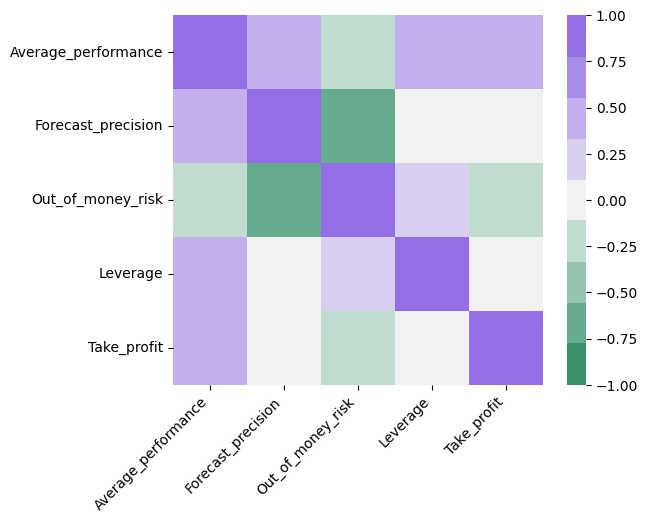

In [15]:
import seaborn as sns
df_factors = final_result.copy()
# Dropping unnecessary columns
df_factors.drop(['Datas', 'Fee_rate', 'Stop_loss'],axis=1,inplace=True)

corr = df_factors.corr()
ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
square=True
)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);